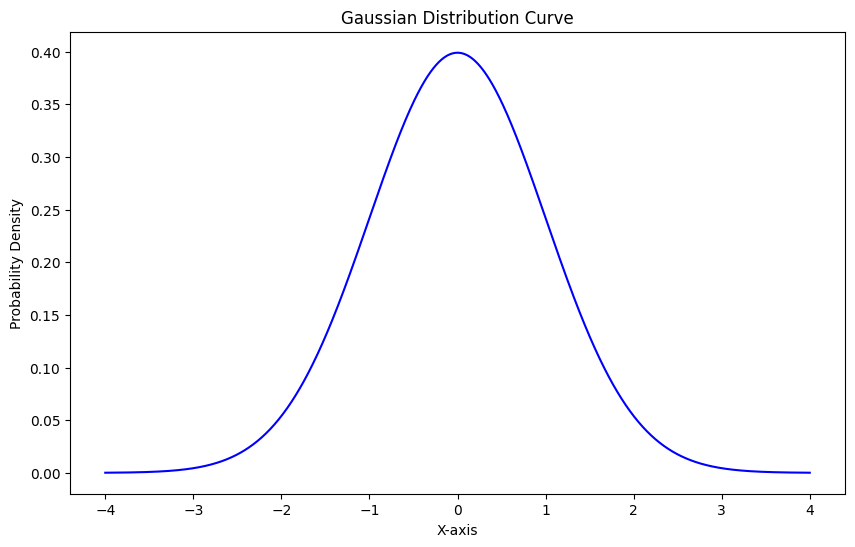

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the Gaussian distribution
mu = 0         # Mean
sigma = 1      # Standard deviation

# Generate x values (range for the Gaussian curve)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the Gaussian curve
y = norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Gaussian Curve (mu={mu}, sigma={sigma})", color="blue")
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title("Gaussian Distribution Curve")
plt.show()

In [35]:
import numpy as np
from PIL import Image
import cv2
import os

# Load and convert the image to grayscale
image_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/002_img.png"
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image) / 255.0        # Normalize to [0, 1] range

# Parameters for Gaussian noise
mu = 0                     
sigma_values = np.linspace(0, 0.5, 30)  # Range of sigma values for progressive noise

# Prepare directory for frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Generate frames with progressively added Gaussian noise
frame_paths = []
for i, sigma in enumerate(sigma_values):
    noise = np.random.normal(mu, sigma, image_array.shape)  # Generate noise
    noisy_image = np.clip(image_array + noise, 0, 1) * 255  # Add noise, clip, and scale to [0, 255]
    noisy_image = noisy_image.astype(np.uint8)               # Convert to uint8 for saving

    # Convert to color image to add colored text
    color_image = cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR)

    text = f"mean: 0, sigma: {sigma:.2f}"  # LaTeX-style math notation for sigma
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3  # Smaller text size
    thickness = 1
    color = (0, 10, 250)  # Text color (blue)

    # Get text size
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Draw a background rectangle for the text
    text_x, text_y = 5, 10
    # Adjust the padding to make the rectangle tighter around the text
    cv2.rectangle(color_image, (text_x - 3, text_y - 3), (text_x + text_width + 3, text_y + text_height + 3), (0, 10, 250), -1)

    # Add text with highlighted background
    cv2.putText(color_image, text, (text_x, text_y + text_height), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)


    # Save each frame
    frame_path = os.path.join(frames_dir, f"frame_{i}.png")
    cv2.imwrite(frame_path, color_image)
    frame_paths.append(frame_path)

# Convert frames to a GIF using Pillow
frames = [Image.open(frame_path) for frame_path in frame_paths]
gif_path = "gaussian_noise_progression.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=800, loop=0)  # Increase duration for slower playback

# Cleanup frames (optional)
for frame_path in frame_paths:
    os.remove(frame_path)

print(f"GIF saved as {gif_path}")


GIF saved as salt_pepper_noise_progression.gif


In [31]:
# Parameters for Gaussian noise
mu = 0                     
sigma_values = np.linspace(0, 0.5, 30)  # Range of sigma values for progressive noise

# Prepare directory for frames
frames_dir = "frames_noise_black"
os.makedirs(frames_dir, exist_ok=True)

# Generate frames with progressively added Gaussian noise on black screen
frame_paths_black = []
for i, sigma in enumerate(sigma_values):
    noise = np.random.normal(mu, sigma, image_array.shape)  # Gaussian noise

    # Apply the noise, keeping the background white
    noisy_image_black = np.clip(1 - noise, 0, 1) * 255  # Invert the noise for a black noise effect on a white background

    # Convert to uint8 for saving or display
    noisy_image_black = noisy_image_black.astype(np.uint8)

    # Convert to a color image to add colored text or further processing
    color_image_black = cv2.cvtColor(noisy_image_black, cv2.COLOR_GRAY2BGR)

    text = f"mean: 0, sigma: {sigma:.2f}"  # LaTeX-style math notation for sigma
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3  # Smaller text size
    thickness = 1
    color = (0, 10, 250)  # Text color (blue)

    # Get text size
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Draw a background rectangle for the text
    text_x, text_y = 5, 10
    # Adjust the padding to make the rectangle tighter around the text
    cv2.rectangle(color_image_black, (text_x - 3, text_y - 3), (text_x + text_width + 3, text_y + text_height + 3), (0, 10, 250), -1)

    # Add text with highlighted background
    cv2.putText(color_image_black, text, (text_x, text_y + text_height), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    # Save each frame
    frame_path_black = os.path.join(frames_dir, f"frame_black_{i}.png")
    cv2.imwrite(frame_path_black, color_image_black)
    frame_paths_black.append(frame_path_black)

# Convert frames to a GIF using Pillow
frames_black = [Image.open(frame_path) for frame_path in frame_paths_black]
gif_path_black = "gaussian_noise_black_progression.gif"
frames_black[0].save(gif_path_black, save_all=True, append_images=frames_black[1:], duration=800, loop=0)  # Increase duration for slower playback

# Cleanup frames (optional)
for frame_path_black in frame_paths_black:
    os.remove(frame_path_black)

print(f"Black screen GIF saved as {gif_path_black}")


Black screen GIF saved as gaussian_noise_black_progression.gif


In [45]:
import numpy as np
from PIL import Image
import cv2
import os

# Load the image and convert to grayscale
image_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/002_img.png"
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image) / 255.0        # Normalize to [0, 1] range

# Range of salt and pepper noise probabilities for progressive noise
salt_probs = np.linspace(0, 0.5, 30)  # Salt noise probability from 0 to 0.5
pepper_probs = np.linspace(0, 0.5, 30)  # Pepper noise probability from 0 to 0.5

# Prepare directory for frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Generate frames with progressively varying salt and pepper noise
frame_paths = []
for i, (salt_prob, pepper_prob) in enumerate(zip(salt_probs, pepper_probs)):
    noisy_image = np.full_like(image_array, 0.5)  # Start with a grey background (0.5 for mid-grey)

    # Add salt noise (white pixels)
    salt = np.random.rand(*image_array.shape) < salt_prob
    noisy_image[salt] = 1  # Set salt pixels to 1 (white)

    # Add pepper noise (black pixels)
    pepper = np.random.rand(*image_array.shape) < pepper_prob
    noisy_image[pepper] = 0  # Set pepper pixels to 0 (black)

    # Convert to uint8 for saving or display
    noisy_image = (noisy_image * 255).astype(np.uint8)

    # Convert to color image to add colored text
    color_image = cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR)

    # Add text to the image
    text = f"Salt: {salt_prob*2:.2f}, Pepper: {pepper_prob*2:.2f}"  # Description of noise
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3  # Smaller text size
    thickness = 1
    color = (0, 10, 250)  # Text color (blue)

    # Get text size
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Draw a background rectangle for the text
    text_x, text_y = 5, 10
    cv2.rectangle(color_image, (text_x - 3, text_y - 3), (text_x + text_width + 3, text_y + text_height + 3), (0, 10, 250), -1)

    # Add text with highlighted background
    cv2.putText(color_image, text, (text_x, text_y + text_height), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    # Save each frame
    frame_path = os.path.join(frames_dir, f"frame_{i}.png")
    cv2.imwrite(frame_path, color_image)
    frame_paths.append(frame_path)

# Convert frames to a GIF using Pillow
frames = [Image.open(frame_path) for frame_path in frame_paths]
gif_path = "salt_pepper_noise_grey_progression.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=800, loop=0)  # Increase duration for slower playback

# Cleanup frames (optional)
for frame_path in frame_paths:
    os.remove(frame_path)

print(f"GIF saved as {gif_path}")


GIF saved as salt_pepper_noise_grey_progression.gif


In [46]:
import numpy as np
from PIL import Image
import cv2
import os

# Load and convert the image to grayscale
image_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/002_img.png"
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image) / 255.0        # Normalize to [0, 1] range

# Range of salt and pepper noise probabilities for progressive noise
salt_probs = np.linspace(0, 0.5, 30)  # Salt noise probability from 0 to 0.5
pepper_probs = np.linspace(0, 0.5, 30)  # Pepper noise probability from 0 to 0.5

# Prepare directory for frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Generate frames with progressively varying salt and pepper noise
frame_paths = []
for i, (salt_prob, pepper_prob) in enumerate(zip(salt_probs, pepper_probs)):
    noisy_image = image_array.copy()  # Start with the white background

    # Add salt noise (white pixels)
    salt = np.random.rand(*image_array.shape) < salt_prob
    noisy_image[salt] = 1  # Set salt pixels to 1 (white)

    # Add pepper noise (black pixels)
    pepper = np.random.rand(*image_array.shape) < pepper_prob
    noisy_image[pepper] = 0  # Set pepper pixels to 0 (black)

    # Convert to uint8 for saving or display
    noisy_image = (noisy_image * 255).astype(np.uint8)

    # Convert to color image to add colored text
    color_image = cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR)

    # Add text to the image
    text = f"Salt: {salt_prob*2:.2f}, Pepper: {pepper_prob*2:.2f}"  # Description of noise
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3  # Smaller text size
    thickness = 1
    color = (0, 10, 250)  # Text color (blue)

    # Get text size
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Draw a background rectangle for the text
    text_x, text_y = 5, 10
    cv2.rectangle(color_image, (text_x - 3, text_y - 3), (text_x + text_width + 3, text_y + text_height + 3), (0, 10, 250), -1)

    # Add text with highlighted background
    cv2.putText(color_image, text, (text_x, text_y + text_height), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    # Save each frame
    frame_path = os.path.join(frames_dir, f"frame_{i}.png")
    cv2.imwrite(frame_path, color_image)
    frame_paths.append(frame_path)

# Convert frames to a GIF using Pillow
frames = [Image.open(frame_path) for frame_path in frame_paths]
gif_path = "salt_pepper_noise_progression.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=800, loop=0)  # Increase duration for slower playback

# Cleanup frames (optional)
for frame_path in frame_paths:
    os.remove(frame_path)

print(f"GIF saved as {gif_path}")


GIF saved as salt_pepper_noise_progression.gif
